The input data consists of hyperspectral bands over a single landscape in Indiana, US, (Indian Pines data set) with 145×145 pixels. For each pixel, the data set contains 220 spectral reflectance bands which represent different portions of the electromagnetic spectrum in the wavelength range 0.4–2.5 10^(-6) meters

In [ ]:
import numpy as np

In [ ]:
arr=np.array([1,2,3,4,5,6,7])
arr

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
arr.shape

(7,)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,precision_score,recall_score,
                             confusion_matrix, classification_report)

import tensorflow as tf

from tqdm import tqdm
from numpy.random import seed
from time import time

seed(11)

In [ ]:
from scipy.io import loadmat

# Load the MATLAB file
mat_data = loadmat('/content/drive/MyDrive/mat file/Indian_pines_corrected.mat')

# Print the variable names in the MATLAB file
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])


In [ ]:
from scipy.io import loadmat

# Load the MATLAB file
mat_data = loadmat('/content/drive/MyDrive/mat file/Indian_pines_gt.mat')

# Print the variable names in the MATLAB file
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_gt'])


## Load Data

In [ ]:
data = loadmat('/content/drive/MyDrive/mat file/Indian_pines_corrected.mat')['indian_pines_corrected']

gt = loadmat('/content/drive/MyDrive/mat file/Indian_pines_gt.mat')['indian_pines_gt']

print(f'Data Shape: {data.shape[:-1]}\nNumber of Bands: {data.shape[-1]}')
# print(f'Data Shape2: {data.shape[1]}\nNumber of Bands: {data.shape[-1]}')
print(f'gt Shape: {gt.shape[:-1]}\nNumber of Bands: {gt.shape[-1]}')

Data Shape: (145, 145)
Number of Bands: 200
gt Shape: (145,)
Number of Bands: 145


In [ ]:
df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1],-1))#Calculates Total number of elements int the orignal data , often used to flatten or reshape a multi-dimensional array into a one-dimensional array.
#-1 in the reshape function is a placeholder that indicates that the number of columns should be automatically determined based on the total number of elements calculated in the previous step.
df.shape

(21025, 200)

In [ ]:
df.columns = ['band' + str(i) for i in range(1, df.shape[-1] + 1)]
df['class'] = gt.ravel() #to convert 2d array to 1d array

In [ ]:
df.head()#values displayed are the spectral values corresponding to the bands

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  ...  \
0   3172   4142   4506   4279   4782   5048   5213   5106   5053    4750  ...   
1   2580   4266   4502   4426   4853   5249   5352   5353   5347    5065  ...   
2   3687   4266   4421   4498   5019   5293   5438   5427   5383    5132  ...   
3   2749   4258   4603   4493   4958   5234   5417   5355   5349    5096  ...   
4   2746   4018   4675   4417   4886   5117   5215   5096   5098    4834  ...   

   band192  band193  band194  band195  band196  band197  band198  band199  \
0     1094     1090     1112     1090     1062     1069     1057     1020   
1     1108     1104     1117     1091     1079     1085     1064     1029   
2     1111     1114     1114     1100     1065     1092     1061     1030   
3     1122     1108     1109     1109     1071     1088     1060     1030   
4     1110     1107     1112     1094     1072     1087     1052     1034   

   band200  class  
0     1020      3  
1     1020      3  
2     1016      3  
3     1006      3  
4     1019      3  

[5 rows x 201 columns]

## Data Visualization

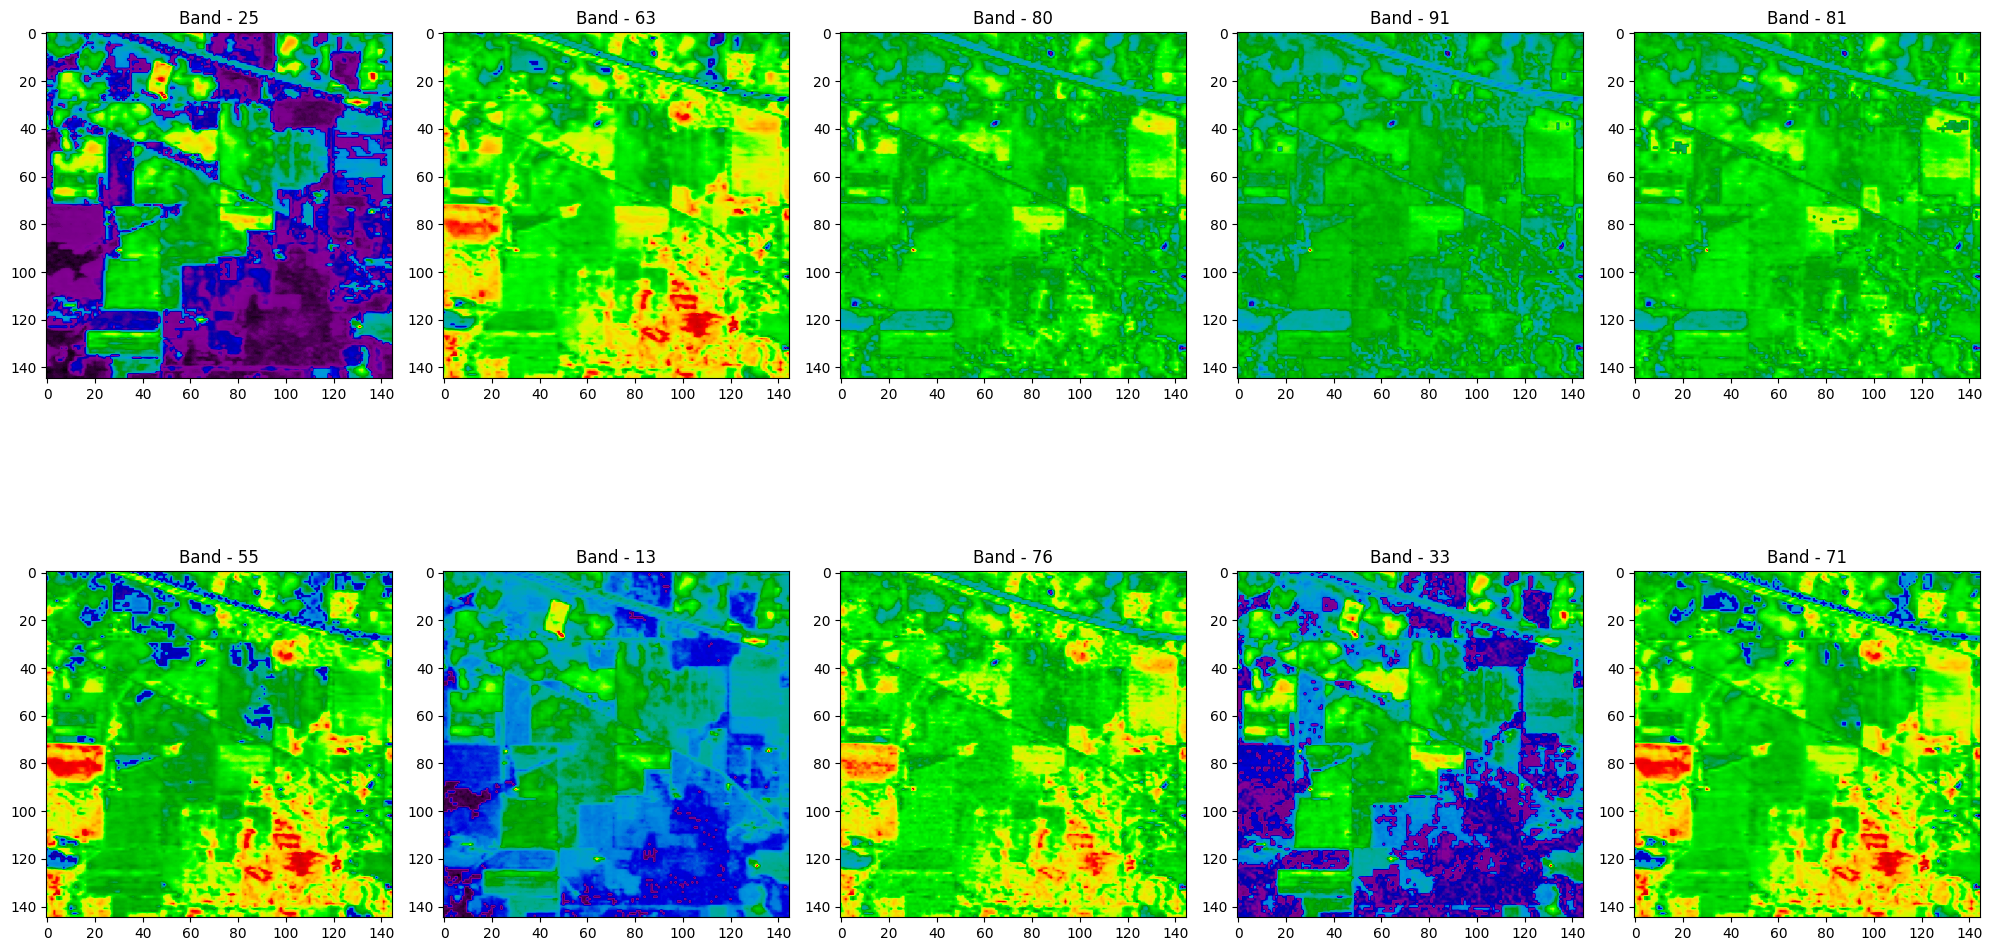

In [ ]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='nipy_spectral')
    ax[i][j].axis('on')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()# Call tight_layout to adjust the spacing between subplots
plt.show()

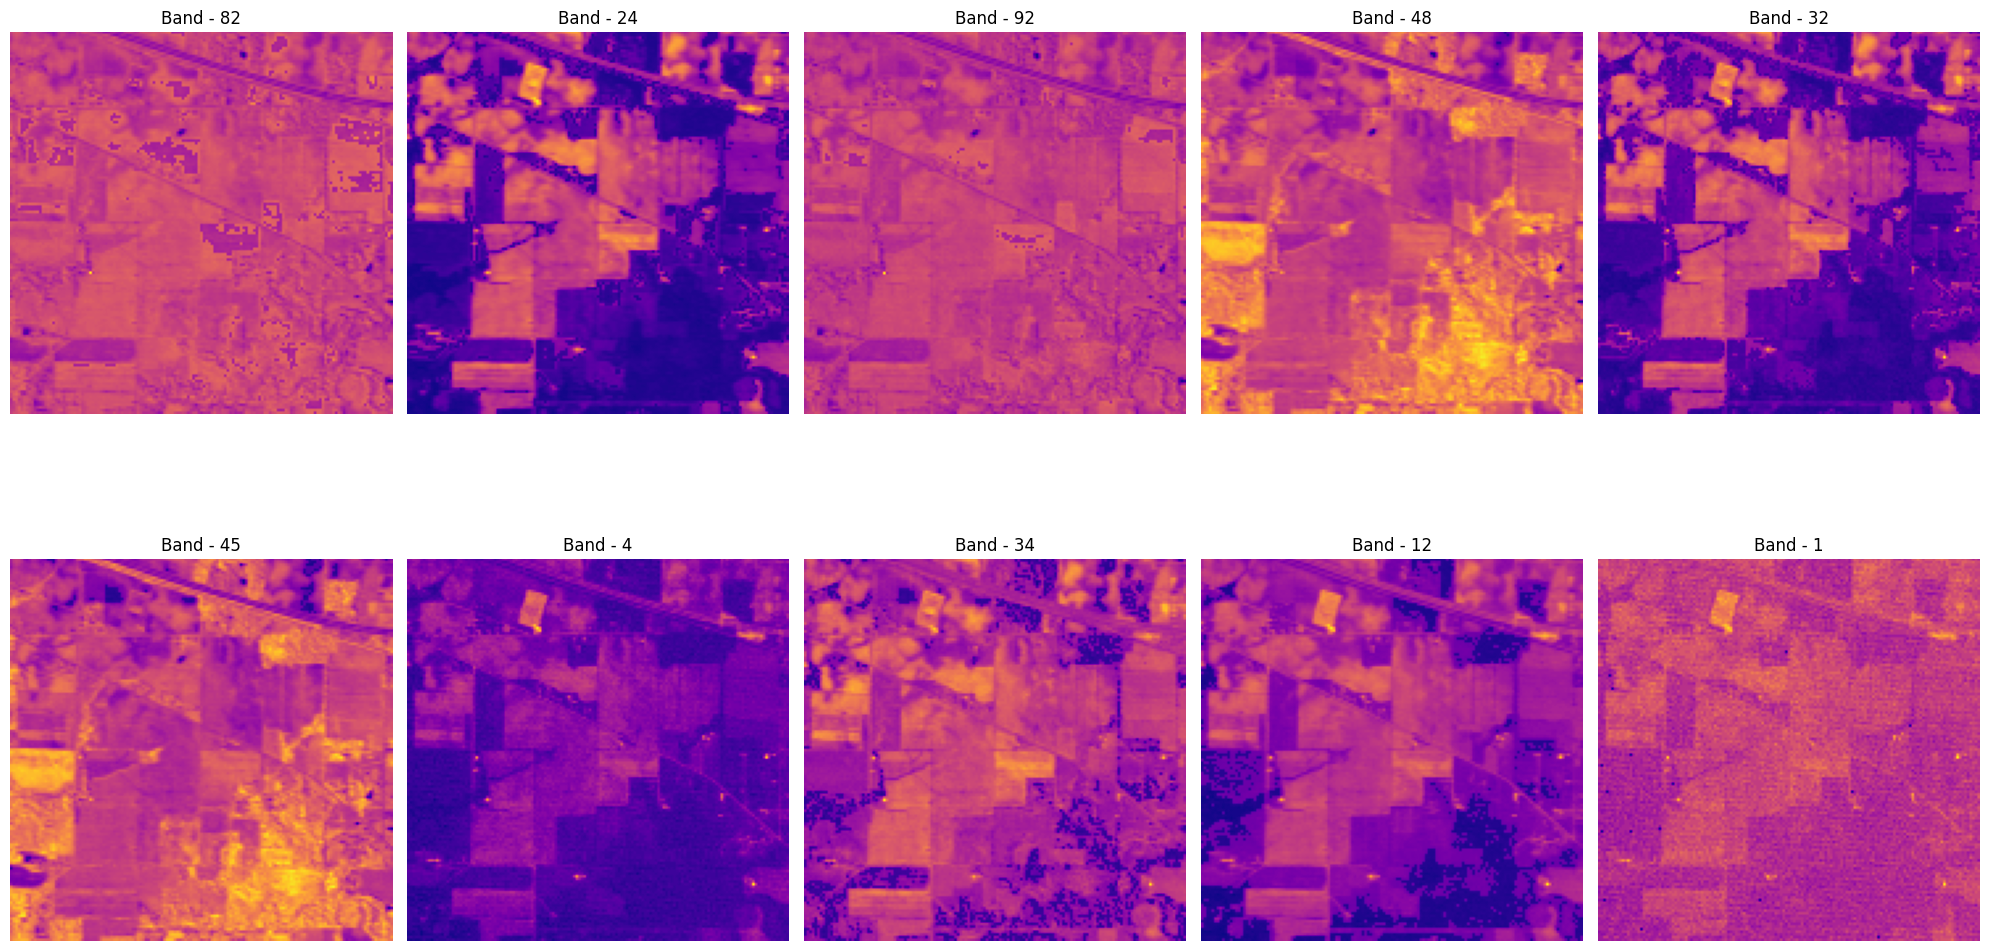

In [ ]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='plasma')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()
plt.show()


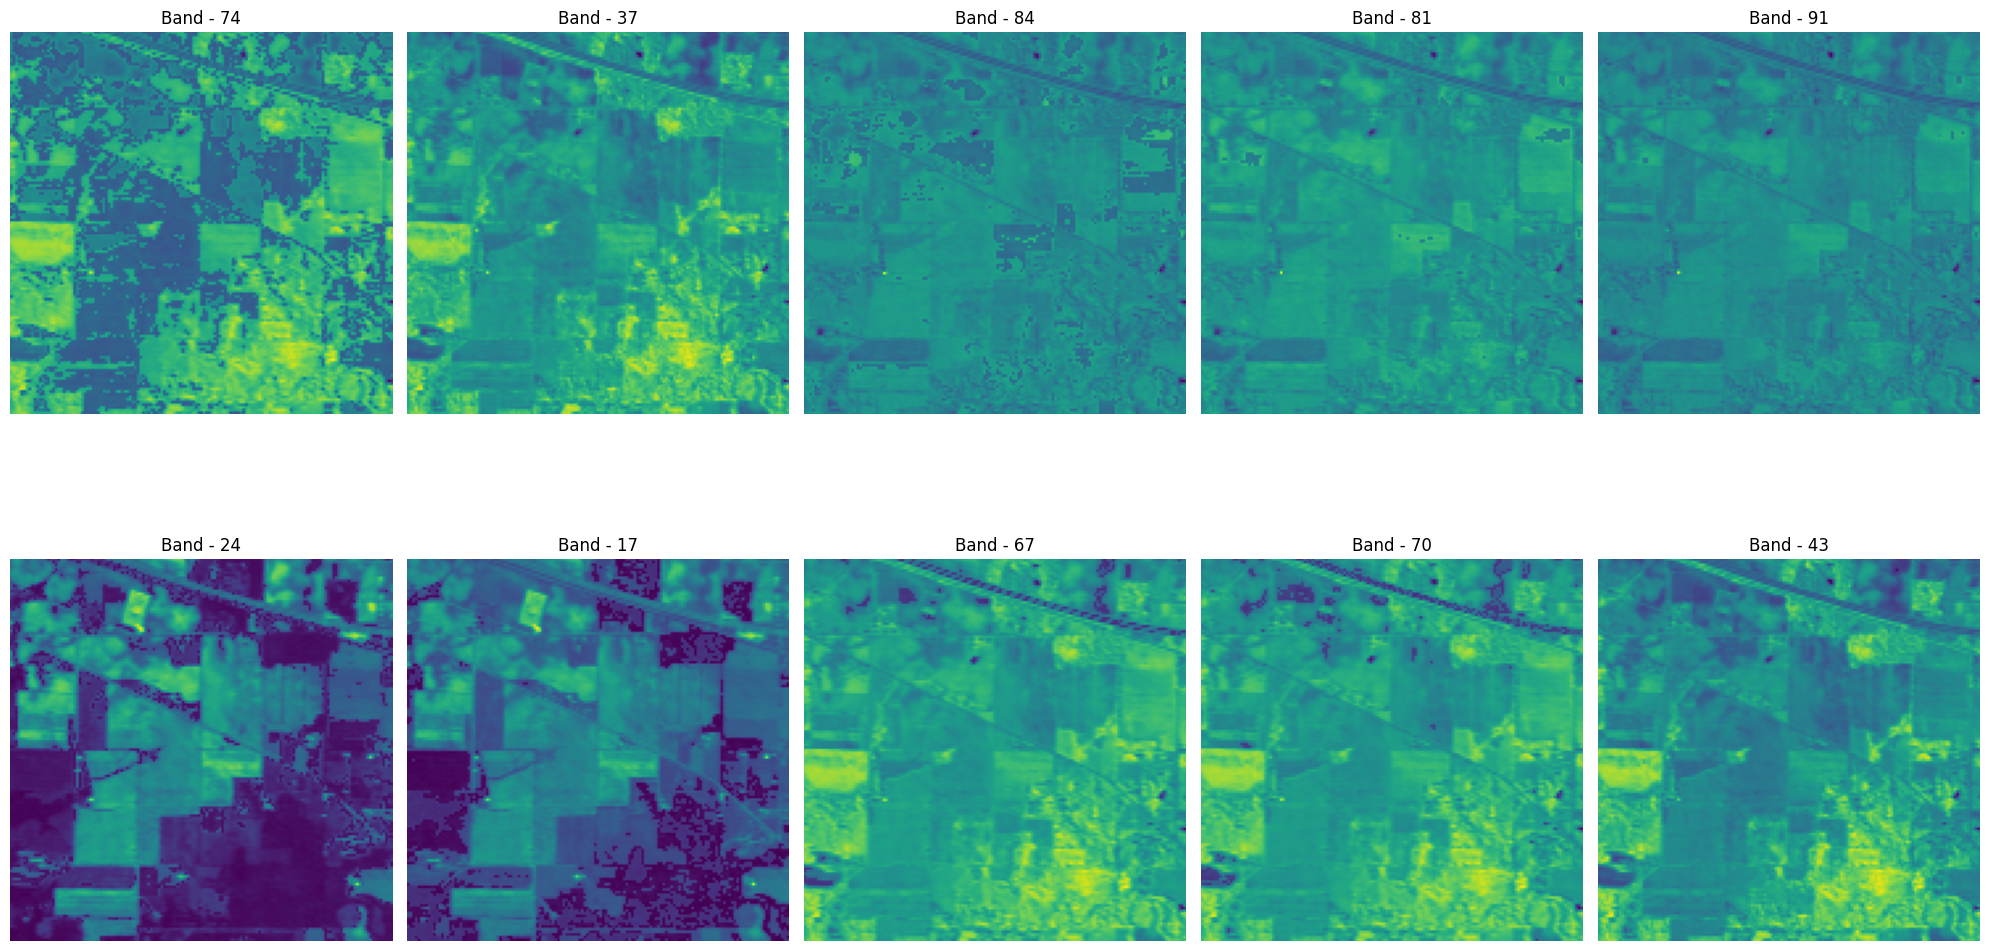

In [ ]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='viridis')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()
plt.show()


## RGB Composite Image

In [ ]:
!pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 51.8 MB/s eta 0:00:00


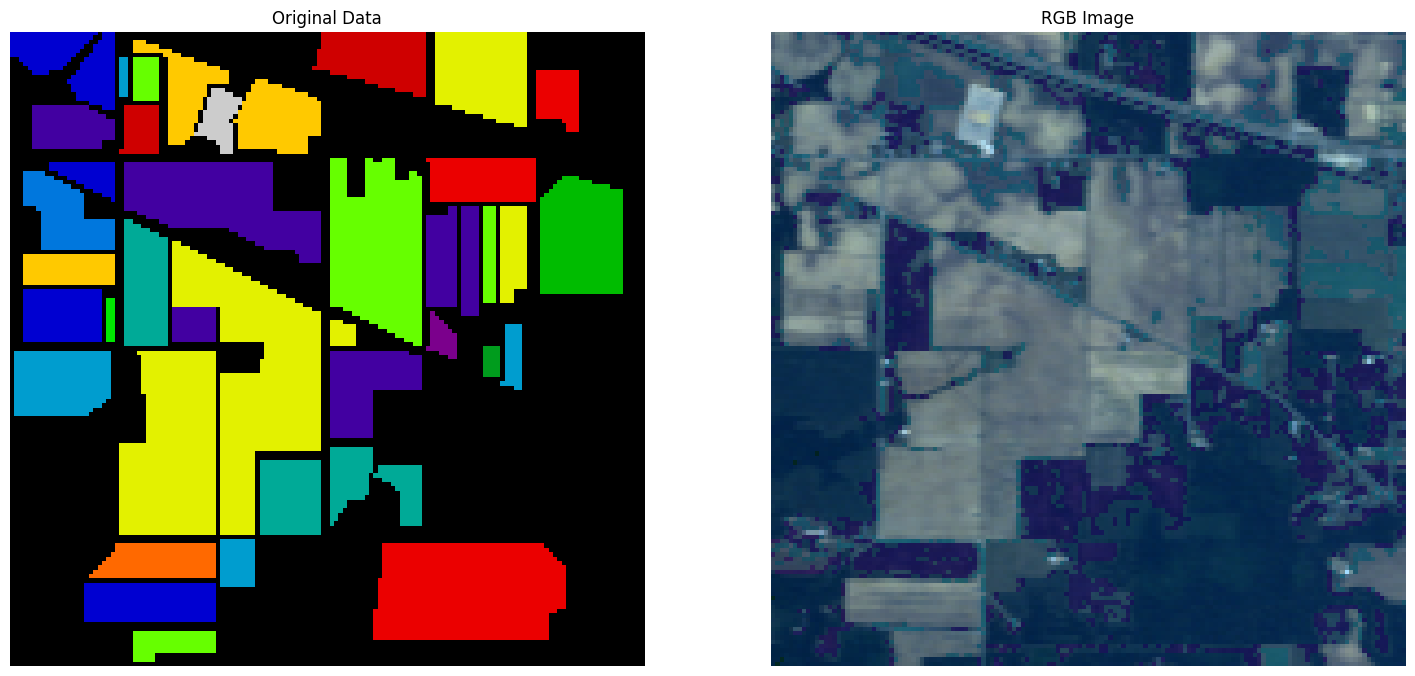

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import earthpy.plot as ep  # Assuming you are using earthpy for ep.plot_rgb

def plot_data(data):
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))

    # Plot the first image using plot_data
    axes[0].imshow(gt, cmap='nipy_spectral')
    axes[0].set_title('Original Data')
    axes[0].axis('off')


    # Plot the second image using ep.plot_rgb
    mdata = np.moveaxis(data, -1, 0)
    ep.plot_rgb(mdata, (29, 19, 9), ax=axes[1], figsize=(15, 15))
    axes[1].set_title('RGB Image')
    axes[1].axis('off')

    plt.show()

# Assuming gt and data are defined somewhere before this function call
plot_data(data)

## Scaling Data

In [ ]:
from keras.utils import to_categorical

In [ ]:
t_df = df[df['class']!=0]#as 0 represents land cover that is not associated with any class
ind = ['band'+str(i) for i in range(1, t_df.shape[-1])]
ind

['band1',
 'band2',
 'band3',
 'band4',
 'band5',
 'band6',
 'band7',
 'band8',
 'band9',
 'band10',
 'band11',
 'band12',
 'band13',
 'band14',
 'band15',
 'band16',
 'band17',
 'band18',
 'band19',
 'band20',
 'band21',
 'band22',
 'band23',
 'band24',
 'band25',
 'band26',
 'band27',
 'band28',
 'band29',
 'band30',
 'band31',
 'band32',
 'band33',
 'band34',
 'band35',
 'band36',
 'band37',
 'band38',
 'band39',
 'band40',
 'band41',
 'band42',
 'band43',
 'band44',
 'band45',
 'band46',
 'band47',
 'band48',
 'band49',
 'band50',
 'band51',
 'band52',
 'band53',
 'band54',
 'band55',
 'band56',
 'band57',
 'band58',
 'band59',
 'band60',
 'band61',
 'band62',
 'band63',
 'band64',
 'band65',
 'band66',
 'band67',
 'band68',
 'band69',
 'band70',
 'band71',
 'band72',
 'band73',
 'band74',
 'band75',
 'band76',
 'band77',
 'band78',
 'band79',
 'band80',
 'band81',
 'band82',
 'band83',
 'band84',
 'band85',
 'band86',
 'band87',
 'band88',
 'band89',
 'band90',
 'band91',
 'band92

Each row in your representation likely corresponds to a pixel in an image, and each column corresponds to a specific spectral band.

In your example, you have 10,249 rows, which could mean that you have information for 10,249 pixels, and each pixel has spectral information from 200 bands.

In [ ]:
X = t_df.loc[:, ind]
X

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  \
0       3172   4142   4506   4279   4782   5048   5213   5106   5053    4750   
1       2580   4266   4502   4426   4853   5249   5352   5353   5347    5065   
2       3687   4266   4421   4498   5019   5293   5438   5427   5383    5132   
3       2749   4258   4603   4493   4958   5234   5417   5355   5349    5096   
4       2746   4018   4675   4417   4886   5117   5215   5096   5098    4834   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
20763   2732   4242   4113   4045   4510   4811   4812   4719   4631    4512   
20764   2561   4242   4290   4255   4520   4865   4918   4819   4908    4586   
20765   2564   4238   4290   4183   4634   4919   5085   4977   4841    4625   
20766   2735   4114   4295   4192   4643   4973   5052   4993   4912    4683   
20767   2732   4122   4388   4335   4734   5017   5123   5090   5105    4806   

       ...  band191  band192  band193  band194  band195  band196  band197  \
0      ...     1135     1094     1090     1112     1090     1062     1069   
1      ...     1137     1108     1104     1117     1091     1079     1085   
2      ...     1144     1111     1114     1114     1100     1065     1092   
3      ...     1146     1122     1108     1109     1109     1071     1088   
4      ...     1135     1110     1107     1112     1094     1072     1087   
...    ...      ...      ...      ...      ...      ...      ...      ...   
20763  ...     1089     1078     1068     1077     1062     1050     1056   
20764  ...     1109     1084     1082     1101     1071     1057     1058   
20765  ...     1116     1091     1091     1096     1076     1061     1067   
20766  ...     1124     1089     1092     1102     1080     1066     1068   
20767  ...     1126     1095     1108     1107     1085     1054     1080   

       band198  band199  band200  
0         1057     1020     1020  
1         1064     1029     1020  
2         1061     1030     1016  
3         1060     1030     1006  
4         1052     1034     1019  
...        ...      ...      ...  
20763     1039     1014     1008  
20764     1054     1018     1004  
20765     1042     1023     1018  
20766     1041     1024     1018  
20767     1054     1024     1014  

[10249 rows x 200 columns]

In [ ]:

y = to_categorical(t_df.loc[:, 'class'])

X_scaled = minmax_scale(X, axis = 0);#rescaling the range of features to scale the range in [0, 1] or [−1, 1].

X_scaled.shape, y.shape

((10249, 200), (10249, 17))

## Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    stratify=y,#stratify=y argument ensures that the class distribution in y is preserved when splitting X and y into training and testing sets
                                                    test_size=0.20)
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (8199, 200)
y_train: (8199, 17)
X_test: (2050, 200)
y_test: (2050, 17)


## Build CNN

In [ ]:
ip_shape = X_train[1].shape

n_outputs = y_train.shape[1]

X_train[1].ravel().shape

(200,)

In [ ]:
X_train.shape[0]

8199

In [ ]:
X_train = X_train.reshape(-1, X_train.shape[0], 1)
X_test = X_test.reshape(-1, X_test.shape[0], 1)
X_train.shape

(8199, 200, 1)

In [ ]:
from keras.models import Sequential


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from kerastuner.tuners import RandomSearch
seed_value = 42
tf.random.set_seed(seed_value)

<ipython-input-27-8d208741b8ee>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
def build_model(hp):
    model = Sequential(name='Indian_pinesCNN')

    # First set of layers with tunable hyperparameters
    model.add(Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(ip_shape[0], 1),
        name='Layer1'
    ))

    model.add(Conv1D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
        activation='relu',
        name='Layer2'
    ))

    # Adding hyperparameters to each layer
    model.add(Conv1D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
        activation='relu',
        name='Layer3'
    ))

    model.add(MaxPooling1D(
        pool_size=hp.Choice('maxpool_1_size', values=[2, 3]),
        name='MaxPooling_Layer1'
    ))

    model.add(Dropout(
        hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1),
        name='Dropout1'
    ))

    # Additional convolutional layers
    for i in range(4, 7):
        model.add(Conv1D(
            filters=hp.Int(f'conv_{i}_filter', min_value=32, max_value=64, step=16),
            kernel_size=hp.Choice(f'conv_{i}_kernel', values=[3, 5]),
            activation='relu',
            name=f'Layer{i}'
        ))

    model.add(MaxPooling1D(
        pool_size=hp.Choice('maxpool_2_size', values=[2, 3]),
        name='MaxPooling_Layer2'
    ))

    model.add(Dropout(
        hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1),
        name='Dropout2'
    ))

    model.add(Flatten(name='Flatten'))

    # Dense layer with tunable units
    model.add(Dense(
        hp.Int('dense_units', min_value=10, max_value=100, step=10),
        activation='relu',
        name='DenseLayer'
    ))

    # Output layer
    model.add(Dense(
        n_outputs,
        activation='softmax',
        name='OutputLayer'
    ))

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials
    executions_per_trial=2,  # Execute each model configuration multiple times
    directory='output',
    project_name='Indian_pinesCNN_tuning'
)

In [ ]:
tuner.search(X_train, y_train,
             epochs=3,
             validation_split=0.1)

Trial 10 Complete [00h 00m 15s]
val_accuracy: 0.5884146392345428

Best val_accuracy So Far: 0.6384146213531494
Total elapsed time: 00h 08m 30s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = build_model(best_hps)
model.summary()

Model: "Indian_pinesCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Conv1D)             (None, 196, 64)           384       
                                                                 
 Layer2 (Conv1D)             (None, 194, 48)           9264      
                                                                 
 Layer3 (Conv1D)             (None, 192, 64)           9280      
                                                                 
 MaxPooling_Layer1 (MaxPool  (None, 96, 64)            0         
 ing1D)                                                          
                                                                 
 Dropout1 (Dropout)          (None, 96, 64)            0         
                                                                 
 Layer4 (Conv1D)             (None, 92, 32)            10272     
                                                   

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=200,
                    validation_split=0.1)

Epoch 1/200
231/231 [==============================] - 4s 9ms/step - loss: 1.6492 - accuracy: 0.4171 - val_loss: 1.4229 - val_accuracy: 0.4707
Epoch 2/200
231/231 [==============================] - 2s 8ms/step - loss: 1.2402 - accuracy: 0.5346 - val_loss: 1.1499 - val_accuracy: 0.5963
Epoch 3/200
231/231 [==============================] - 2s 7ms/step - loss: 1.0609 - accuracy: 0.6047 - val_loss: 0.9217 - val_accuracy: 0.6500
Epoch 4/200
231/231 [==============================] - 1s 6ms/step - loss: 0.9227 - accuracy: 0.6613 - val_loss: 0.8450 - val_accuracy: 0.6817
Epoch 5/200
231/231 [==============================] - 1s 6ms/step - loss: 0.8088 - accuracy: 0.6987 - val_loss: 0.8043 - val_accuracy: 0.6939
Epoch 6/200
231/231 [==============================] - 1s 6ms/step - loss: 0.7363 - accuracy: 0.7296 - val_loss: 0.7579 - val_accuracy: 0.7098
Epoch 7/200
231/231 [==============================] - 1s 6ms/step - loss: 0.6929 - accuracy: 0.7361 - val_loss: 0.6747 - val_accuracy: 0.7390

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss',# EarlyStopping: It helps to prevent overfitting and saves time, especially in situations where you don't want to train the model longer than needed.
                            mode = 'min',
                            min_delta = 0,
                            patience = 10,
                            restore_best_weights = True)

checkpoint = ModelCheckpoint(filepath = '/content/drive/MyDrive/mat file/Indian_pines_corrected_1.mat',
                             monitor = 'val_loss',
                             mode ='min',
                             save_best_only = True)

tensorboard = TensorBoard(log_dir='SA_logs/{}'.format(time()))

In [ ]:
hist = model.fit(X_train,
                       y_train,
                       epochs = 100,
                       batch_size = 256 ,
                       validation_data = (X_test, y_test),
                       callbacks=[early_stop,
                                  checkpoint,
                                  tensorboard])

Epoch 1/100
33/33 [==============================] - 7s 118ms/step - loss: 0.1314 - accuracy: 0.9583 - val_loss: 0.3140 - val_accuracy: 0.9137
Epoch 2/100
33/33 [==============================] - 3s 79ms/step - loss: 0.1049 - accuracy: 0.9655 - val_loss: 0.2986 - val_accuracy: 0.9102
Epoch 3/100
33/33 [==============================] - 1s 17ms/step - loss: 0.0852 - accuracy: 0.9709 - val_loss: 0.3135 - val_accuracy: 0.9088
Epoch 4/100
33/33 [==============================] - 0s 14ms/step - loss: 0.0838 - accuracy: 0.9722 - val_loss: 0.3301 - val_accuracy: 0.9005
Epoch 5/100
33/33 [==============================] - 0s 13ms/step - loss: 0.1144 - accuracy: 0.9624 - val_loss: 0.3369 - val_accuracy: 0.9117
Epoch 6/100
33/33 [==============================] - 0s 14ms/step - loss: 0.0832 - accuracy: 0.9732 - val_loss: 0.3046 - val_accuracy: 0.9161
Epoch 7/100
33/33 [==============================] - 0s 14ms/step - loss: 0.0769 - accuracy: 0.9733 - val_loss: 0.3142 - val_accuracy: 0.9146
Epoch

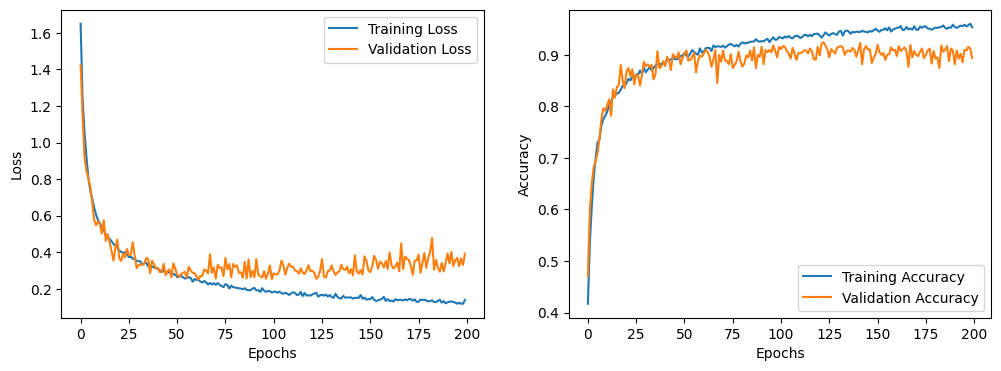

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()


In [ ]:
accuracy_l=[]
precision_l=[]
recall_l=[]

In [ ]:
print(hist.history['accuracy'])

[0.9582875967025757, 0.9654836058616638, 0.9708501100540161, 0.9721917510032654, 0.9624344706535339, 0.9731674790382385, 0.973289430141449, 0.9768264293670654, 0.9713379740715027, 0.9764605164527893, 0.9792657494544983, 0.9734113812446594]


In [ ]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
17/17 [==============================] - 0s 4ms/step - loss: 0.2986 - accuracy: 0.9102
test loss, test acc: [0.2986220121383667, 0.9102439284324646]


In [ ]:
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:17])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
1/1 [==============================] - 0s 309ms/step
predictions shape: (17, 17)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8199, 200, 1)
y_train shape: (8199, 17)
X_test shape: (2050, 200, 1)
y_test shape: (2050, 17)


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Assuming y_test is in one-hot encoded format
predictions = model.predict(X_test)
y_1d1 = np.argmax(predictions, axis=1)

# If y_test is in one-hot encoded format, convert it to class indices
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision and recall
precision = precision_score(y_true_classes, y_1d1, average='weighted')
recall = recall_score(y_true_classes, y_1d1, average='weighted')

print("Precision:", precision)
print("Recall:", recall)


65/65 [==============================] - 0s 2ms/step
Precision: 0.9113779253490583
Recall: 0.9102439024390244


In [ ]:
pred = np.argmax(model.predict(X_test), axis=1)

# Classification Report
print(classification_report(pred, np.argmax(y_test, 1),
      target_names = [ '1. Alfalfa',
'2.Corn-notill',
'3.Corn-mintill',
'4.Corn',
'5.Grass-pasture',
'6.Grass-trees',
'7.Grass-pasture-mowed',
'8.Hay-windrowed',
'9.Oats',
'10.Soybean-notill',
'11.Soybean-mintill',
'12.Soybean-clean',
'13.Wheat',
'14.Woods',
'15.Buildings-Grass-Trees-Drives',
'16.Stone-Steel-Towers']))

65/65 [==============================] - 0s 4ms/step
                                 precision    recall  f1-score   support

                     1. Alfalfa       0.89      0.89      0.89         9
                  2.Corn-notill       0.86      0.91      0.88       270
                 3.Corn-mintill       0.86      0.86      0.86       166
                         4.Corn       0.87      0.75      0.80        55
                5.Grass-pasture       0.94      0.98      0.96        93
                  6.Grass-trees       0.99      0.99      0.99       145
          7.Grass-pasture-mowed       0.80      1.00      0.89         4
                8.Hay-windrowed       0.99      0.99      0.99        96
                         9.Oats       0.75      0.60      0.67         5
              10.Soybean-notill       0.87      0.88      0.88       192
             11.Soybean-mintill       0.91      0.88      0.90       506
               12.Soybean-clean       0.89      0.91      0.90       1

SVM PART

In [ ]:
t_df = df[df['class']!=0]#as 0 represents land cover that is not associated with any class
ind = ['band'+str(i) for i in range(1, t_df.shape[-1])]
ind

['band1',
 'band2',
 'band3',
 'band4',
 'band5',
 'band6',
 'band7',
 'band8',
 'band9',
 'band10',
 'band11',
 'band12',
 'band13',
 'band14',
 'band15',
 'band16',
 'band17',
 'band18',
 'band19',
 'band20',
 'band21',
 'band22',
 'band23',
 'band24',
 'band25',
 'band26',
 'band27',
 'band28',
 'band29',
 'band30',
 'band31',
 'band32',
 'band33',
 'band34',
 'band35',
 'band36',
 'band37',
 'band38',
 'band39',
 'band40',
 'band41',
 'band42',
 'band43',
 'band44',
 'band45',
 'band46',
 'band47',
 'band48',
 'band49',
 'band50',
 'band51',
 'band52',
 'band53',
 'band54',
 'band55',
 'band56',
 'band57',
 'band58',
 'band59',
 'band60',
 'band61',
 'band62',
 'band63',
 'band64',
 'band65',
 'band66',
 'band67',
 'band68',
 'band69',
 'band70',
 'band71',
 'band72',
 'band73',
 'band74',
 'band75',
 'band76',
 'band77',
 'band78',
 'band79',
 'band80',
 'band81',
 'band82',
 'band83',
 'band84',
 'band85',
 'band86',
 'band87',
 'band88',
 'band89',
 'band90',
 'band91',
 'band92

In [ ]:
X = t_df.loc[:, ind]
X

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  \
0       3172   4142   4506   4279   4782   5048   5213   5106   5053    4750   
1       2580   4266   4502   4426   4853   5249   5352   5353   5347    5065   
2       3687   4266   4421   4498   5019   5293   5438   5427   5383    5132   
3       2749   4258   4603   4493   4958   5234   5417   5355   5349    5096   
4       2746   4018   4675   4417   4886   5117   5215   5096   5098    4834   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
20763   2732   4242   4113   4045   4510   4811   4812   4719   4631    4512   
20764   2561   4242   4290   4255   4520   4865   4918   4819   4908    4586   
20765   2564   4238   4290   4183   4634   4919   5085   4977   4841    4625   
20766   2735   4114   4295   4192   4643   4973   5052   4993   4912    4683   
20767   2732   4122   4388   4335   4734   5017   5123   5090   5105    4806   

       ...  band191  band192  band193  band194  band195  band196  band197  \
0      ...     1135     1094     1090     1112     1090     1062     1069   
1      ...     1137     1108     1104     1117     1091     1079     1085   
2      ...     1144     1111     1114     1114     1100     1065     1092   
3      ...     1146     1122     1108     1109     1109     1071     1088   
4      ...     1135     1110     1107     1112     1094     1072     1087   
...    ...      ...      ...      ...      ...      ...      ...      ...   
20763  ...     1089     1078     1068     1077     1062     1050     1056   
20764  ...     1109     1084     1082     1101     1071     1057     1058   
20765  ...     1116     1091     1091     1096     1076     1061     1067   
20766  ...     1124     1089     1092     1102     1080     1066     1068   
20767  ...     1126     1095     1108     1107     1085     1054     1080   

       band198  band199  band200  
0         1057     1020     1020  
1         1064     1029     1020  
2         1061     1030     1016  
3         1060     1030     1006  
4         1052     1034     1019  
...        ...      ...      ...  
20763     1039     1014     1008  
20764     1054     1018     1004  
20765     1042     1023     1018  
20766     1041     1024     1018  
20767     1054     1024     1014  

[10249 rows x 200 columns]

In [ ]:
y = to_categorical(t_df.loc[:, 'class'])

X_scaled = minmax_scale(X, axis = 0);#rescaling the range of features to scale the range in [0, 1] or [−1, 1].

X_scaled.shape, y.shape

((10249, 200), (10249, 17))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    stratify=y,#stratify=y argument ensures that the class distribution in y is preserved when splitting X and y into training and testing sets
                                                    test_size=0.20,random_state=42)
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (8199, 200)
y_train: (8199, 17)
X_test: (2050, 200)
y_test: (2050, 17)


In [ ]:
y_1d = np.argmax(y_train, axis=1)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly',random_state = 0)
classifier.fit(X_train,y_1d)

SVC(kernel='poly', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred.shape

(2050,)

In [ ]:
y_1d1 = np.argmax(y_test, axis=1)

In [ ]:
y_1d = np.argmax(y_test, axis=1)
y_1d.shape

(2050,)

In [ ]:
accuracy=accuracy_score(y_1d1,y_pred)
y_pred1 = np.argmax(y_pred, axis=0)
# If y_test is in one-hot encoded format, convert it to class indices
#y_true_classes = np.argmax(y_test, axis=1)
# Calculate precision and recall
precision = precision_score(y_1d1, y_pred,average='weighted')
recall = recall_score(y_1d1, y_pred,average='weighted')
print("Accuracy = ",accuracy)
print("prevision = ",precision)
print("Recall = ",recall)

Accuracy =  0.8902439024390244
prevision =  0.8902443879980512
Recall =  0.8902439024390244


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_1d,y_pred)
print(cm)

[[  8   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0 254   4   1   0   1   0   0   0   9  17   0   0   0   0   0]
 [  0   8 136   4   0   0   0   0   0   0  17   1   0   0   0   0]
 [  0   1   4  41   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   1  93   1   0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0 143   0   0   0   0   0   0   0   2   1   0]
 [  0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0  95   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0]
 [  0   3   2   0   0   0   0   0   0 155  34   0   0   0   0   0]
 [  0  28   8   0   1   0   0   0   0  20 432   1   0   0   1   0]
 [  0   1   1   3   0   0   0   0   0   1   7 106   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0  40   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0 244   8   0]
 [  0   0   0   0   4   1   0   0   0   1   0   0   0  20  51 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

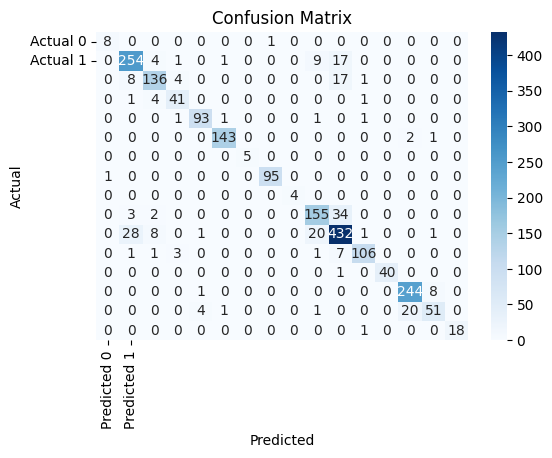

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
term_model = RandomForestClassifier(random_state=51)
term_model.fit(X_train,y_train)

RandomForestClassifier(random_state=51)

In [ ]:
y_pred = term_model.predict(X_test)
#accuracy=accuracy_score(y_1d,y_pred)
y_pred1 = np.argmax(y_pred, axis=0)
# If y_test is in one-hot encoded format, convert it to class indices
#y_true_classes = np.argmax(y_test, axis=1)
# Calculate precision and recall
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
print("Accuracy = ",accuracy)
print("prevision = ",precision)
print("Recall = ",recall)

0.7721951219512195
Accuracy =  0.7721951219512195
prevision =  0.9314466659478098
Recall =  0.7721951219512195


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
